# setup and EDA

## import libraries

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import flake8
import pycodestyle_magic
import pandas as pd
import random
print(tf.__version__)

2.5.0


## variables

In [6]:
fashion_mnist = tf.keras.datasets.fashion_mnist  # noqa: E999
# %reload_ext pycodestyle_magic
# %pycodestyle_on
# %flake8_on

train_images, train_labels = '', ''
X_train, X_test, y_train, y_test = '', '', '', ''

## methods

In [40]:
def unique_values(df, col):
    '''
    Displays the unique number and unique values
    '''
    if isinstance(col, list):
        for i in col:
            cnt = 0
            visited = []
            for j in range(0, len(df[i])):
                if df[i][j] not in visited:
                    visited.append(df[i][j])
                    cnt += 1
            print(f'\n{i}')
            print(f'no.of.unique values : {cnt}')
            if len(visited) < 20:
                print(f'unique values : {visited}')

    else:
        cnt = 0
        visited = []
        for j in range(0,  len(df[col])):
            if df[col][j] not in visited:
                visited.append(df[col][j])
                cnt += 1
        print(f'\n{col}')
        print(f'no.of.unique values : {cnt}')
        if len(visited) < 20:
            print(f'unique values : {visited}')


def model_parameters(seed_=42,
                     units_for_layers=[1],
                     activation_layers=[0],
                     softmax_layer=False,
                     optimizer_='Adam',
                     loss=False,
                     loss_metric='mae',
                     model_summary='relu',
                     epochs_=100,
                     verbose_=0,
                     normalized=False,
                     X_train_=X_train,
                     X_test_=X_test,
                     y_train_=False,
                     y_test_=False,
                     model_view=False,
                     compiled_model_view=False,
                     predict_=False,
                     evaluate_=False,
                     output = False,
                     loss_epoch_plot=False,
                     predict_plot=False,
                     figsize='12, 6',
                     plot_font_size=20,
                     flatten_images=False,
                     activation=False):
    print(activation)
    '''
    This method create, compiles, and fits models
    through the TensorFlow models.
    '''
    # optimizer text
    optimizer_ = 'tf.optimizers.' + str(optimizer_) + '()'
    # Set random seed
    tf.random.set_seed(seed_)
    # loss metric text
    if loss:
        loss_text = 'tf.losses.' + str(loss)
    else:
        loss_text = 'tf.losses.' + str(loss_metric)
    metric_text = str(loss_metric)
    # Create a new model (same as model_2)
    if normalized:
        model_start_ = 'tf.keras.Sequential([\nnormalized,'
    else:
        model_start_ = 'tf.keras.Sequential([\n'
    model_end_ = '])'
    model_middle = ''
    if flatten_images:
        temp = "      tf.keras.layers.Flatten(input_shape=(" +\
            '' + str(flatten_images) + ',' + str(flatten_images) + "))"
        model_middle = model_middle + temp + ',\n'
    for i, j in zip(units_for_layers, activation_layers):
        if j == 1:
            temp = "      tf.keras.layers.Dense(" +\
                str(i) + ", activation = '" + activation + "')"
        else:
            temp = '      tf.keras.layers.Dense('+str(i)+')'
        model_middle = model_middle + temp + ',\n'
    if softmax_layer:
        temp = '      tf.keras.layers.Softmax()'
        model_middle = model_middle + temp + ',\n'        
    # Create a model using the sequntial API
    model_text = model_start_ + model_middle + model_end_
    if model_view:
        print(f'\n\nMODEL CREATION : \n{model_text}')
    model_ = eval(model_text)

    # Compile the model
    compiled_model_text = 'model_.compile(\n     loss = ' + loss_text +\
                          ',\n     optimizer = ' + optimizer_ +\
                          ',\n     metrics = ' + metric_text + '\n)'
    if compiled_model_view:
        print(f'\n\nCOMPILED MODEL : \n{compiled_model_text}\n\n')
    # Training the dataset
    print(f'\n\nTRAINING THE MODEL USING THE TRAINING DATASET :')    
    eval(compiled_model_text)
    # Fit the model
    if compiled_model_view and X_test_:
        print(model_.fit(X_train_,
                               y_train_,
                               epochs=epochs_,
                               verbose=verbose_,
                               validation_data=(X_test_, y_test_)))
    else:
        print(model_.fit(X_train_,y_train_,epochs=epochs_))
    #print(fit_model)
    # Print model summary
    if model_summary:
        print('\nMODEL SUMMARY :')
        print(model_.summary())
    # Evaluate
    if evaluate_:
        if loss_metric=="['accuracy']":
            print('\nEVALUATE (VALIDATION) :')
            test_loss, test_acc = model_.evaluate(X_test_, y_test_)
            print('\nTest accuracy:', test_acc)
        else:    
            print('\nEVALUATE (VALIDATION) :')
            print(model_.evaluate(X_test_, y_test_))
    # create DataFRame
    if compiled_model_view:
        df_hist = pd.DataFrame(model_.history)
    # loss_epoch_plot
    if loss_epoch_plot:
        print('\n')
        plt.figure(figsize=(eval(figsize)))
        plt.plot(df_hist)
        plt.ylabel('loss', fontsize=plot_font_size)
        plt.xlabel('epochs', fontsize=plot_font_size)
        plt.show()
    # Plot predictions vs real value
    if predict_: 
        y_pred = model_.predict(X_test_)
        #y_pred_df = pd.DataFrame(y_pred, columns=['y_pred'])
        #y_pred_df['y_test'] = pd.DataFrame(y_test_)

    if predict_plot:
        print('\n')
        '''
        Plotting a predicted vs true values with
        a regression and Confidence Interval = 95%'''
        plt.figure(figsize=(eval(figsize)))
        y_reg = sns.regplot(data=y_pred_df,
                            x=y_pred,
                            y=y_test,
                            line_kws=dict(color='black'),
                            scatter_kws=dict(color='gray'))
        y_reg.set_xlabel('Y Predicted', fontsize=plot_font_size)
        y_reg.set_ylabel('Y Real', fontsize=plot_font_size)
        ideal_line = matplotlib.lines.Line2D([10, 50], [10, 50], color='red')
        y_reg.add_line(ideal_line)
        y_reg.legend(['Predictions Trendline',
                      'Ideal Trendline',
                      'Predictions'],
                     fontsize=plot_font_size, loc=4)
        y_reg.set_title('Y Real (test) VS Y Predicted',
                        fontsize=plot_font_size)
        #  fig = y_reg.get_figure()
        
    if output == 'model':
        return(model_)
    elif output == 'predict':
        return(y_pred)
    
    #return(fit_model)


def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)


def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

# obtain the data

In [8]:
(train_images,
 train_labels), (test_images,
                 test_labels) = fashion_mnist.load_data()


In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

## Explore the data

In [10]:
data_ = train_images
print('\nTrain images description :')
print(f'Number of images : {data_.shape[0]}')
print(f'Image size : {data_.shape[1]}x{data_.shape[2]}')


Train images description :
Number of images : 60000
Image size : 28x28


In [11]:
list_ = list(np.unique(train_labels))
len_ = len(list_)
print(f'\nThere are {len_} unique '
      f'values in the training labels {list(np.unique(train_labels))}\n')


There are 10 unique values in the training labels [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]



In [12]:
data_ = test_images
print('\nTest images description :')
print(f'Number of images : {data_.shape[0]}')
print(f'Image size : {data_.shape[1]}x{data_.shape[2]}')


Test images description :
Number of images : 10000
Image size : 28x28


## Preprocess the data

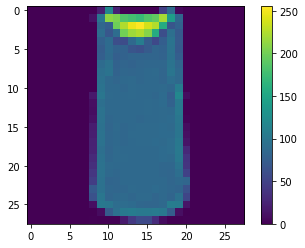

In [13]:
plt.figure()
plt.imshow(train_images[2])
plt.colorbar()
plt.grid(False)
plt.show()

In [14]:
train_images = train_images / 255.0

test_images = test_images / 255.0

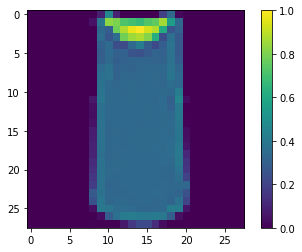

In [15]:
plt.figure()
plt.imshow(train_images[2])
plt.colorbar()
plt.grid(False)
plt.show()

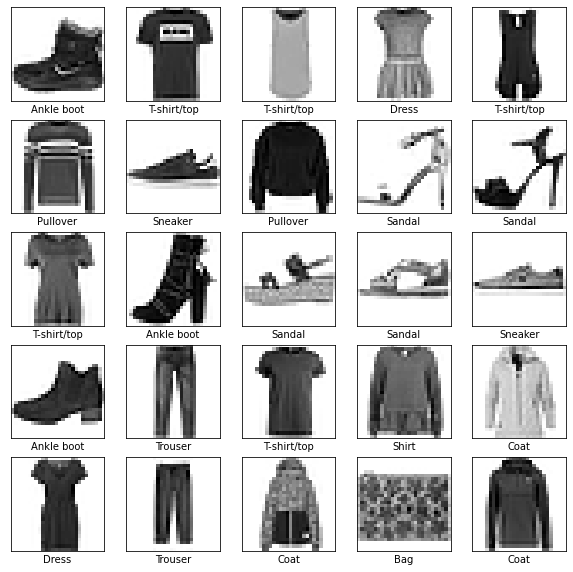

In [16]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Model and fit the dataset

In [41]:

'''
1st layer is flatten to prepare the images (28x28) into a 1D array.
2nd activation as relu would be if the output of a neuron is greater 
than 0 then activate. If it is less 0 then don't.
3rd layer is 10 neurons for the 10 classifications in the dataset
'''

model = model_parameters(seed_=42,
                         units_for_layers=[128, 10],
                         activation_layers=[1, 0],
                         optimizer_='Adam',
                         loss='SparseCategoricalCrossentropy(from_logits=True)',
                         loss_metric="['accuracy']",
                         model_summary=True,
                         epochs_=10,
                         verbose_=2,
                         normalized=False,
                         X_train_=train_images,
                         X_test_=test_images,
                         y_train_=train_labels,
                         y_test_=test_labels,
                         model_view=True,
                         compiled_model_view=False,
                         evaluate_=True,
                         predict_=False,
                         loss_epoch_plot=False,
                         predict_plot=False,
                         figsize='12, 6',
                         plot_font_size=20,
                         flatten_images=28,
                         activation='relu')

relu


MODEL CREATION : 
tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(28,28)),
      tf.keras.layers.Dense(128, activation = 'relu'),
      tf.keras.layers.Dense(10),
])


TRAINING THE MODEL USING THE TRAINING DATASET :
Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4952 - accuracy: 0.8262
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3737 - accuracy: 0.8650: 1s - loss: 0.3 - ETA
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3368 - accuracy: 0.8763
Epoch 4/10
1875/1875 [==============================] - 2s 991us/step - loss: 0.3119 - accuracy: 0.8875
Epoch 5/10
1875/1875 [==============================] - 2s 985us/step - loss: 0.2942 - accuracy: 0.8903
Epoch 6/10
1875/1875 [==============================] - 2s 986us/step - loss: 0.2790 - accuracy: 0.8960
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2682 - accuracy: 0.9010
Epoch 8/10
1875/18


The test image :


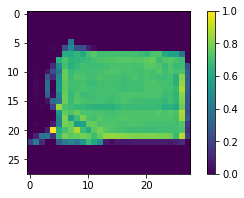

 
Of 10 categories :
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] the prediction levels of the image are : 

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]

This image is a Bag. The number 8 category with the liklihood of 100.0%



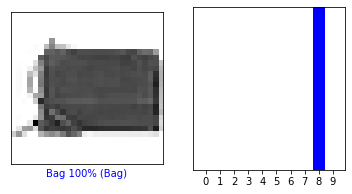

In [35]:
print('\nThe test image :')

image_nr = random.randint(0, len(test_images))
plt.figure(figsize=(6,3))
plt.imshow(test_images[image_nr])
plt.colorbar()
plt.grid(False)
plt.show()

pred_array = prediction[image_nr]

print(f' \nOf {len(class_names)} categories :\n{class_names}'
      f' the prediction levels of the image are : '
      f'\n\n{np.round(pred_array, 4)}')
print(f'\nThis image is a {class_names[np.argmax(prediction[image_nr])]}.'
      f' The number {np.argmax(prediction[image_nr])} '
      f'category with the liklihood of {round(max(prediction[image_nr])*100,0)}%\n')

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(image_nr, prediction[image_nr], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(image_nr, prediction[image_nr],  test_labels)
plt.show()

In [37]:
'''
Added layer is the activation softmax layer.
It increases the liklihood that a that the computer
would choose the correct classification 
'''

prediction = model_parameters(seed_=42,
                         units_for_layers=[128, 10],
                         activation_layers=[1, 0],
                         optimizer_='Adam',
                         softmax_layer=True,
                         loss='SparseCategoricalCrossentropy(from_logits=True)',
                         loss_metric="['accuracy']",
                         model_summary=True,
                         epochs_=10,
                         verbose_=2,
                         normalized=False,
                         X_train_=train_images,
                         X_test_=test_images,
                         y_train_=train_labels,
                         y_test_=test_labels,
                         model_view=True,
                         compiled_model_view=False,
                         evaluate_=True,
                         predict_=True,
                         output = 'predict',
                         loss_epoch_plot=False,
                         predict_plot=False,
                         figsize='12, 6',
                         plot_font_size=20,
                         flatten_images=28,
                         activation='relu')

relu


MODEL CREATION : 
tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(28,28)),
      tf.keras.layers.Dense(128, activation = 'relu'),
      tf.keras.layers.Dense(10),
      tf.keras.layers.Softmax(),
])


TRAINING THE MODEL USING THE TRAINING DATASET :
Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6749 - accuracy: 0.7952
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6199 - accuracy: 0.8441
Epoch 3/10
1875/1875 [==============================] - 2s 999us/step - loss: 1.6085 - accuracy: 0.8547
Epoch 4/10
1875/1875 [==============================] - 2s 994us/step - loss: 1.6006 - accuracy: 0.8615
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.5945 - accuracy: 0.8675
Epoch 6/10
1875/1875 [==============================] - ETA: 0s - loss: 1.5913 - accuracy: 0.87 - 2s 1ms/step - loss: 1.5913 - accuracy: 0.8708
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step -


The test image :


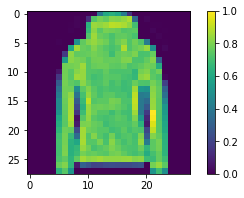

 
Of 10 categories :
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] the prediction levels of the image are : 

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]

This image is a Coat. The number 4 category with the liklihood of 100.0%



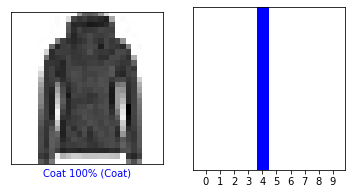

In [28]:
print('\nThe test image :')

image_nr = random.randint(0, len(test_images))
plt.figure(figsize=(6,3))
plt.imshow(test_images[image_nr])
plt.colorbar()
plt.grid(False)
plt.show()

pred_array = prediction[image_nr]

print(f' \nOf {len(class_names)} categories :\n{class_names}'
      f' the prediction levels of the image are : '
      f'\n\n{np.round(pred_array, 2)}')
print(f'\nThis image is a {class_names[np.argmax(prediction[image_nr])]}.'
      f' The number {np.argmax(prediction[image_nr])} '
      f'category with the liklihood of {round(max(prediction[image_nr])*100,0)}%\n')

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(image_nr, prediction[image_nr], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(image_nr, prediction[image_nr],  test_labels)
plt.show()

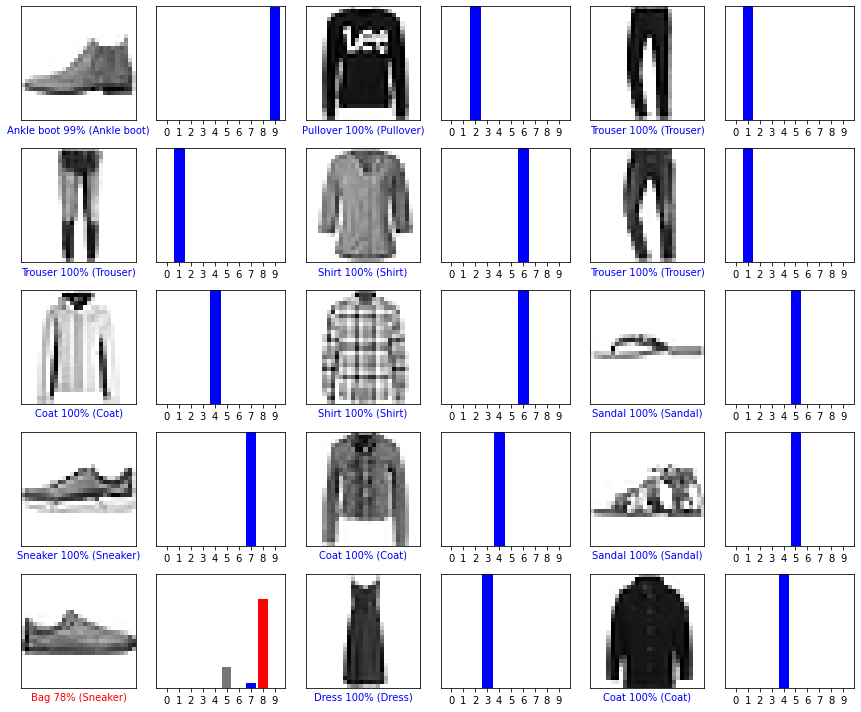

In [31]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, prediction[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, prediction[i], test_labels)
plt.tight_layout()
plt.show()